# Mots

In [13]:
!pip install pandas
!pip install spacy
!pip install Counter
!pip install plotly
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 11.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import spacy
from collections import Counter
import nltk
from nltk.probability import FreqDist
import plotly.express as px

In [8]:
# Charger les données
df = pd.read_csv('labeled_data_with_predictions.csv')

# Charger le modèle SpaCy
nlp = spacy.load("en_core_web_sm")

# Stopwords personnalisés (ajouter ici les mots que vous voulez exclure)
custom_stopwords = {"https", "twitter", "elon", "musk", "people","quit","leave","stay", "like", "amp", "com", "user", "retweet", "go", "delete", "account"}

def clean_and_tokenize_spacy(text):
    """
    Utiliser SpaCy pour tokeniser et nettoyer le texte.
    """
    if not isinstance(text, str):
        return []
    doc = nlp(text.lower())
    tokens = [
        token.lemma_  # Récupérer le lemme (forme de base du mot)
        for token in doc
        if not token.is_stop  # Exclure les stopwords de SpaCy
        and token.is_alpha  # Exclure les caractères non alphabétiques
        and token.lemma_ not in custom_stopwords  # Exclure les mots personnalisés
    ]
    return tokens

# Appliquer le nettoyage et la tokenisation avec SpaCy
df['tokens'] = df['cleaned_tweet'].apply(clean_and_tokenize_spacy)

In [9]:
liste = []
for ligne in df['tokens']:
    liste = liste + ligne
liste = [token for token in liste if len(token) > 1]

In [15]:
fdist = FreqDist(liste)
fd = pd.DataFrame(fdist.most_common(30), columns = ["Word","Frequency"]).drop([0]).reindex()
fig = px.bar(fd, x="Word", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',marker_line_color='rgb(8,48,107)',marker_line_width=1.5, opacity=0.8)
fig.show()

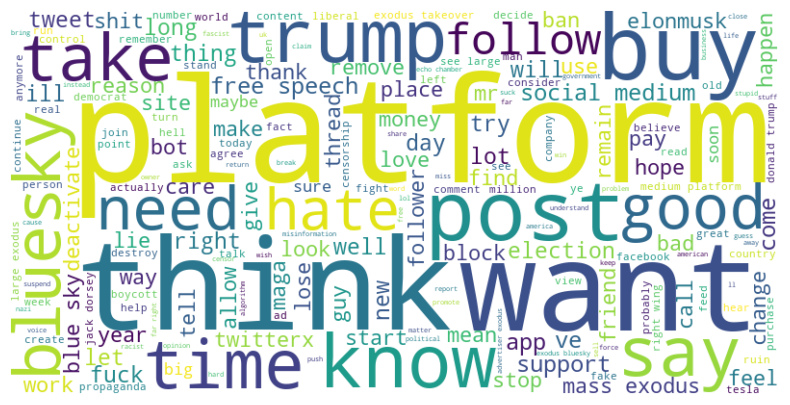

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(liste)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[(('free', 'speech'), 471), (('social', 'medium'), 461), (('will', 'not'), 363), (('mass', 'exodus'), 308), (('not', 'want'), 251), (('blue', 'sky'), 248), (('medium', 'platform'), 203), (('large', 'exodus'), 192), (('exodus', 'takeover'), 180), (('see', 'large'), 177)]


KeyboardInterrupt: 

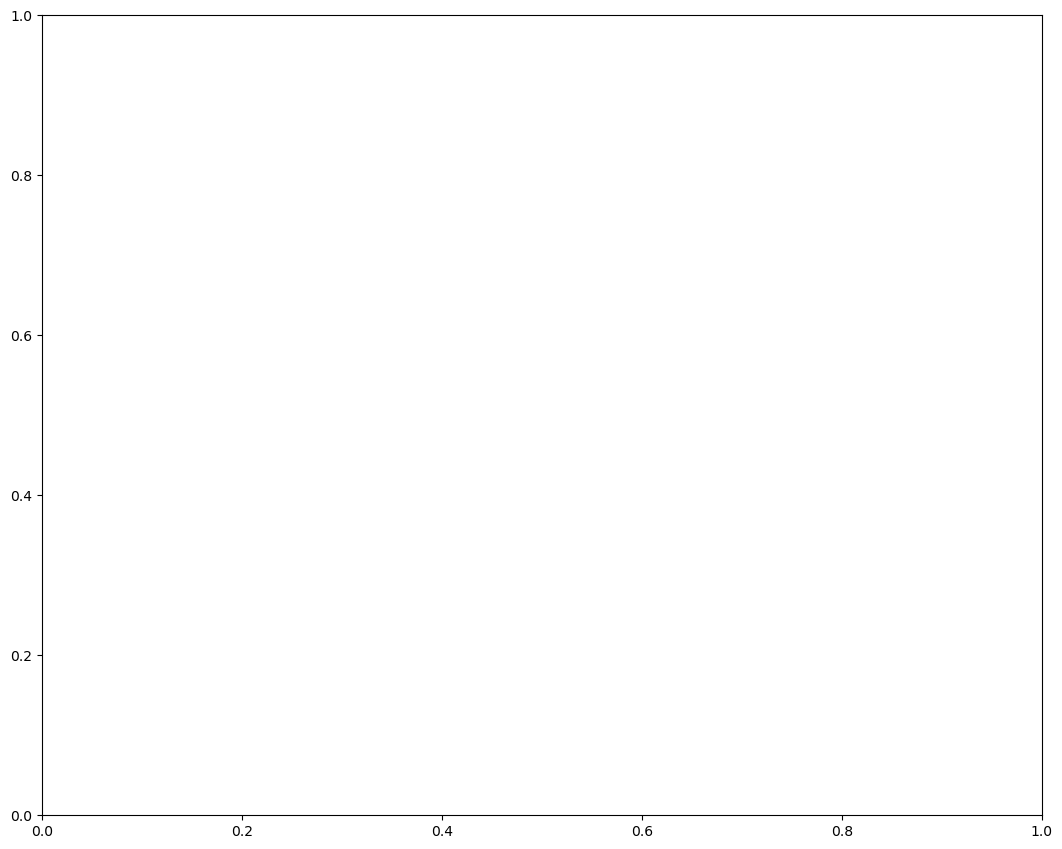

In [18]:
from nltk.util import ngrams
from collections import Counter

# Générer les bigrammes à partir de la liste
bigrams = list(ngrams(liste, 2))

# Compter les occurrences des bigrammes
bigram_counts = Counter(bigrams)
print(bigram_counts.most_common(10))  # Afficher les 10 bigrammes les plus fréquents

import networkx as nx
from itertools import combinations

# Créer un graphe vide
G = nx.Graph()

# Ajouter les bigrammes comme arêtes du graphe
for bigram in bigrams:
    G.add_edge(*bigram)

# Visualiser le graphe
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
nx.draw(
    G,
    with_labels=True,
    node_size=50,
    font_size=8,
    node_color="skyblue",
    edge_color="gray"
)
plt.show()

